In [93]:
import pandas as pd

In [94]:
dataSet = pd.read_csv('Mall_Customers.csv')

In [95]:
x = dataSet.iloc[:,[3,4]].values

In [96]:
from sklearn.cluster import KMeans
cluster = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    cluster.append(kmeans.inertia_)

In [97]:
cluster

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.83934915659,
 21850.165282585633,
 19672.07284901432]

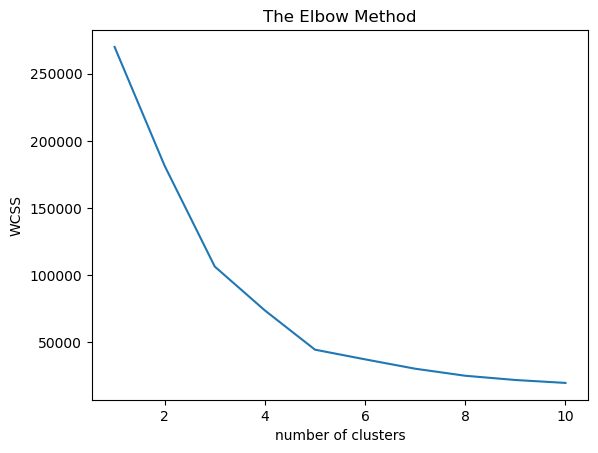

In [98]:
plt.plot(range(1,11), cluster) # first x second y
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [132]:
from sklearn.cluster import DBSCAN
dbScan = DBSCAN(eps = 5, min_samples=5)
y_predict = dbScan.fit_predict(x)

C:\Users\REVANTH KUMAR\Anaconda3\envs\hopeAi\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\REVANTH KUMAR\Anaconda3\envs\hopeAi\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):


In [133]:
dataSet['cluster_group'] = y_predict

In [134]:
dataSet.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,-1


C:\Users\REVANTH KUMAR\Anaconda3\envs\hopeAi\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


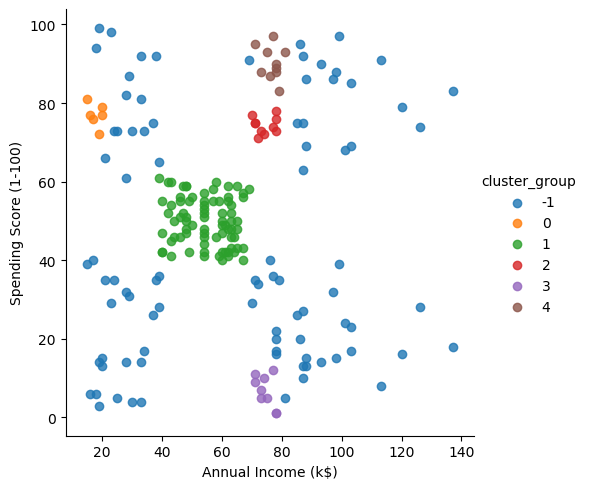

In [135]:
import seaborn as sns
facet = sns.lmplot(data = dataSet, x=dataSet.columns[3], y=dataSet.columns[4], hue = dataSet.columns[5],
                  fit_reg = False, legend = True, legend_out = True )